In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd 
from tensorflow import keras
import os

In [ ]:
[name for name in dir(keras.initializers) if not name.startswith("_")]
[m for m in dir(keras.activations) if not m.startswith("_")]
[n for n in dir(keras.layers) if not n.startswith("_")]
[d for d in dir(keras.datasets) if not d.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'IdentityInitializer',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'OrthogonalInitializer',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [16]:
(x_train, y_train), (x_test_full, y_test_full) = keras.datasets.cifar10.load_data()
x_valid, y_valid = x_test_full[:5000] / 255., y_test_full[:5000]
x_test, y_test= x_test_full[5000:] / 255., y_test_full[5000:]
x_train = x_train / 255.

In [52]:
y_train.reshape(-1)

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [51]:
y_train.shape

(50000, 1)

(-0.5, 31.5, 31.5, -0.5)

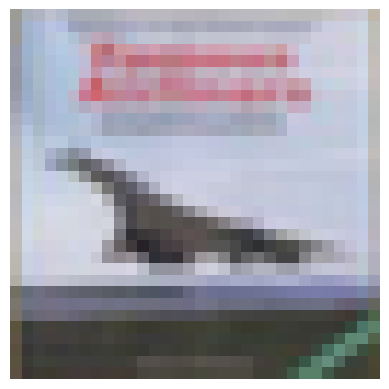

In [23]:
import matplotlib.pyplot as plt 
plt.imshow(x_test_full[3])
plt.axis('off')

In [30]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
class_names[y_train[0][0]]

'Frog'

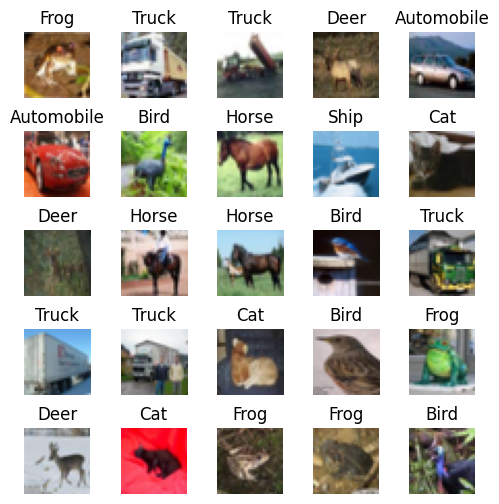

In [32]:
rows = 5
columns = 5
plt.figure(figsize=(rows*1.2, columns*1.2))
for r in range(rows):
    for c in range(columns):
        index = columns * r + c
        plt.subplot(rows, columns, index+1)
        plt.axis('off')
        plt.imshow(x_train[index])
        plt.title(class_names[y_train[index][0]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32,32,3]),
    keras.layers.Dense(500, kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation='softmax'),
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_valid, y_valid))

In [39]:
cb = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),  
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)
]

model.evaluate(x_test, y_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5001 - loss: 1.4119


[1.3996037244796753, 0.508400022983551]

In [43]:
model_2 = keras.models.Sequential()
model_2.add(keras.layers.Flatten(input_shape=[32,32,3]))
model_2.add(keras.layers.Dense(500, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(10):
    model_2.add(keras.layers.Dense(200, activation="selu",
                                 kernel_initializer="lecun_normal"))
model_2.add(keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'))
model_2.add(keras.layers.Dense(10, activation="softmax"))
model_2.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = model_2.fit(x_train, y_train, epochs=30, callbacks=cb, validation_data=(x_valid, y_valid))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.2278 - loss: 2.2198 - val_accuracy: 0.3808 - val_loss: 1.7335 - learning_rate: 0.0100
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.3761 - loss: 1.7248 - val_accuracy: 0.4266 - val_loss: 1.6034 - learning_rate: 0.0100
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.4154 - loss: 1.6092 - val_accuracy: 0.4264 - val_loss: 1.5979 - learning_rate: 0.0100
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.4433 - loss: 1.5409 - val_accuracy: 0.4338 - val_loss: 1.5892 - learning_rate: 0.0100
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.4680 - loss: 1.4806 - val_accuracy: 0.4592 - val_loss: 1.5105 - learning_rate: 0.0100
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.4851 - loss: 1.4367 - val_accuracy: 0.4806 - val_loss: 1.4712 - learning_rate: 0.0100
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accura

In [ ]:
model_2.evaluate(x_test, y_test)

# we should turn to CNN 

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5281 - loss: 1.3506


[1.3633384704589844, 0.5221999883651733]

In [54]:
y_train.shape

(50000, 1)

In [59]:
y_train = y_train.reshape(-1)
y_valid = y_valid.reshape(-1)
y_test = y_test.reshape(-1)

In [58]:
y_train.shape

(50000,)

In [73]:
def split_set(x, y):
    y_bird_cat = (y == 2) | (y == 3)
    y_A = y[~y_bird_cat]
    y_A[y_A>3] -= 2
    y_B = (y[y_bird_cat]==3).astype(np.float32)
    return ((x[~y_bird_cat], y_A), (x[y_bird_cat], y_B))

(x_train_A, y_train_A), (x_train_B, y_train_B) = split_set(x_train, y_train)
(x_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_set(x_valid, y_valid)
(x_test_A, y_test_A), (x_test_B, y_test_B) = split_set(x_test, y_test)

In [74]:
y_train_B.shape

(10000,)

In [65]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for n_hidden in (300, 300, 100, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])
history = model_A.fit(x_train_A, y_train_A, epochs=20,
                    validation_data=(x_valid_A, y_valid_A))

c:\Users\ibrah\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.3529 - loss: 1.5842 - val_accuracy: 0.4691 - val_loss: 1.3619
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4783 - loss: 1.3331 - val_accuracy: 0.5267 - val_loss: 1.2526
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5133 - loss: 1.2654 - val_accuracy: 0.5232 - val_loss: 1.2370
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5309 - loss: 1.2212 - val_accuracy: 0.5585 - val_loss: 1.1765
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5486 - loss: 1.1810 - val_accuracy: 0.5470 - val_loss: 1.1846
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5565 - loss: 1.1525 - val_accuracy: 0.5600 - val_loss: 1.1608
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5644 - loss: 1.1421 - val_accuracy: 0.5640 - val_loss: 1.1539
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5742 -

In [66]:
model_A.save("my_model_A.h5")

In [72]:
y_train_B.shape

(0,)

In [75]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[32,32,3]))
for n_hidden in (300, 300, 100, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])
history = model_B.fit(x_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

c:\Users\ibrah\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.6037 - loss: 0.6784 - val_accuracy: 0.6957 - val_loss: 0.5643
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7201 - loss: 0.5617 - val_accuracy: 0.6501 - val_loss: 0.6406
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7417 - loss: 0.5363 - val_accuracy: 0.7304 - val_loss: 0.5325
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7554 - loss: 0.5169 - val_accuracy: 0.7384 - val_loss: 0.5267
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7590 - loss: 0.5093 - val_accuracy: 0.6690 - val_loss: 0.6089
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7544 - loss: 0.5086 - val_accuracy: 0.6898 - val_loss: 0.5865
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7657 - loss: 0.4989 - val_accuracy: 0.7443 - val_loss: 0.5233
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7547 - loss: 0.5099 - val_accu

In [76]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(x_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4502 - loss: 1.0883 - val_accuracy: 0.5312 - val_loss: 0.7336
Epoch 2/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5149 - loss: 0.7455 - val_accuracy: 0.5828 - val_loss: 0.6825
Epoch 3/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5784 - loss: 0.6954 - val_accuracy: 0.6274 - val_loss: 0.6493
Epoch 4/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6045 - loss: 0.6726 - val_accuracy: 0.6452 - val_loss: 0.6275


In [77]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(x_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/16
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6680 - loss: 0.6153 - val_accuracy: 0.7393 - val_loss: 0.5335
Epoch 2/16
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7310 - loss: 0.5441 - val_accuracy: 0.7582 - val_loss: 0.5090
Epoch 3/16
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7446 - loss: 0.5259 - val_accuracy: 0.7740 - val_loss: 0.4970
Epoch 4/16
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7569 - loss: 0.5126 - val_accuracy: 0.7701 - val_loss: 0.4936
Epoch 5/16
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7594 - loss: 0.4983 - val_accuracy: 0.7284 - val_loss: 0.5369
Epoch 6/16
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7685 - loss: 0.4917 - val_accuracy: 0.7562 - val_loss: 0.5069
Epoch 7/16
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7749 - loss: 0.4863 - val_accuracy: 0.7711 - val_loss: 0.4822
Epoch 8/16
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7712 - loss: 0.4806 - val_accu

In [80]:
model_B.evaluate(x_test_B, y_test_B)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6724 - loss: 0.6167


[0.6059264540672302, 0.6881937384605408]

In [ ]:
def exponential_decay(lr=0.1, s=20):
    def func(epoch):
        return lr * 0.1(epoch/s)
    return func

learning_rate_exponential = exponential_decay()

optimizer = keras.optimizers.Nadam(learning_rate= learning_rate_exponential, beta_1=0.9, beta_2=0.999, decay=1e-4)


c:\Users\ibrah\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
import math 
n_steps_per_epoch = math.ceil(len(x_train) / 32)
learning_rate_piecewise = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001])

In [ ]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer= optimizer,
                     
                     metrics=["accuracy"])
history = model_B_on_A.fit(x_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))